In [44]:
import numpy as np
import scipy.optimize

import sklearn
import sklearn.linear_model

import seaborn as sns
from matplotlib import pyplot as plt


In [45]:
def run_expectile_decoding(reversal_points, taus, minv=0., maxv=1., method=None, max_samples=10000, max_epochs=10, N=100):
    def expectile_loss_fn(expectiles, taus, samples):
        delta = samples[None, :] - expectiles[:, None]
        indic = (delta <= 0.).astype(np.float32)
        grad = -0.5 * np.abs(taus[:, None] - indic) * delta
        return np.mean((np.mean(grad, axis=-1)) ** 2)

    ind = np.argsort(reversal_points)
    points, tau = np.array(reversal_points)[ind], np.array(taus)[ind]
    sampled_dist = []

    for _ in range(max_epochs):
        samples = np.random.uniform(minv, maxv, size=(max_samples, N))
        fvalues = np.array([expectile_loss_fn(points, tau, x0) for x0 in samples])
        x0 = np.sort(samples[fvalues.argmin()])
        result = scipy.optimize.minimize(
            lambda x: expectile_loss_fn(points, tau, x),
            method=method,
            bounds=[(minv, maxv)] * len(x0),
            x0=x0
        )
        sampled_dist.extend(result["x"].tolist())

    final_loss = expectile_loss_fn(points, tau, np.array(sampled_dist))
    return sampled_dist, final_loss


In [46]:
# 1. 奖励值 (Amounts): 
juice_amounts = np.array([1.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0])

# 2. 概率 (Probs): 大概呈正态分布
juice_empirical_probs = np.array([0.05, 0.1, 0.15, 0.4, 0.15, 0.1, 0.05])

# 3. 效用 (Utility): 
juice_util = np.array([-2.0, -1.0, -0.35, 0.16, 0.61, 1.0, 1.36])


In [47]:
var_mag_values = np.array([(0.14723085014789711, 0.0033614698516132471),
                            (0.28667599774228614, 0.021082047404663212),
                            (0.28748251623549403, 0.049914307764483815),
                            (1.3480737534396756, 0.42196866227890156),
                            (1.4125829520026296, 0.2235311630494646),
                            (1.6045034820863808, 0.47702076606215371),
                            (3.2848767728849375, 0.3618169272255663),
                            (3.5349203217064185, 0.44251699585808746),
                            (3.7255198380895553, 0.51354237852028162),
                            (4.1701645396832827, 0.24596278464602545),
                            (4.3778473672540272, 0.3389597335165157),
                            (4.3819834616604236, 0.4109029572142629),
                            (4.5687396324777776, 0.22381550301577841),
                            (4.7432185053035987, 0.98442343982467528),
                            (4.8867786789047276, 0.53931528154401065),
                            (5.1545083160041001, 0.56729757738255948),
                            (5.3809271892982986, 0.58246691207675527),
                            (5.4864699584151664, 0.68976626445596256),
                            (5.8339188805237727, 0.55480031389511075),
                            (6.2720723207776592, 0.55707650132171915),
                            (6.440584024346915, 0.66221660546254524),
                            (6.6818030225629439, 0.65433601123932617),
                            (6.8779347387975447, 0.79852221439758531),
                            (7.8087442676123002, 0.75769015692609276),
                            (9.1472582490193517, 0.73113239691022691),
                            (10.202846417424675, 0.63879297718190153),
                            (10.234208410480866, 0.66074850653214368),
                            (11.277139094915993, 0.7518787167727442),
                            (12.894339210279924, 0.80620103870695436),
                            (13.779164335318981, 0.67485657176374936),
                            ])
expectile_values, asym_values = var_mag_values.T

In [48]:
util_asym_values = np.array([0.665148134736891,0.65208410906952,0.613744203780139,0.775212700883808,0.707915816841008,0.570103354233973,0.882127332095316,0.508575044586604,0.486016624470385,0.490519368353783,0.353180140687647,0.34502602367731,0.274459190431141,0.624608202330519,0.511245599898681,0.275963695780172,0.574282416537853,0.494461077846514,0.249573167763381,1.01616027303818,0.136555552978056,0.716127024137563,0.658310695222273,0.493856204792549,0.815972879462343,0.433624365681467,0.643716612535732,0.724905499014785,0.3681787227383,0.705733696238299,0.76246447053036,0.739327730375869,0.590831434674471,0.346659782367775,0.449000983609862,0.662902110431635,0.645905621173483,0.16704746815482,0.846125077182948,0.689060956288534])
util_expectile_values = np.array([1.19796718528621,0.909588860368442,0.768290210301997,1.5580695804582,1.18069340075516,-0.917277009040899,1.76606208326366,-1.99990282124502,-0.52508567014901,-0.72677865537825,-0.317750664489987,-0.0555191676477702,-0.498294836948614,1.16799418233059,-1.86969915298433,-0.980841264017123,0.0346564269295749,-0.917418194178877,-2.19520456394411,8.10381872775166,-3.18979437039029,4.18823808094621,1.59258444073823,-0.210742609830699,4.38901915501838,-1.0533487207759,0.472919232719837,1.69636515581653,-1.55263442315208,4.99096579152878,2.16489750392618,4.1202653189854,2.53839455360929,-0.981001892834966,-0.967509962517738,0.554271248178451,2.11181823971785,-0.766921663162386,3.38445321759506,3.21931839438752])
util_asym_values = np.clip(util_asym_values, 0., 1.)

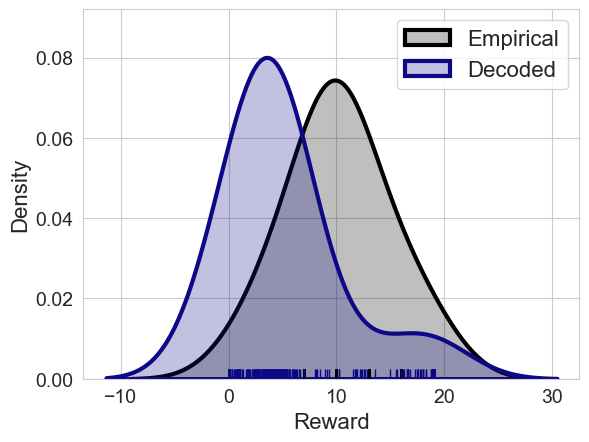

In [49]:
sampled_empirical_dist = np.random.choice(
    juice_amounts, p=juice_empirical_probs, size=1000)

reward_decode, fvl = run_expectile_decoding(
    expectile_values, 
    asym_values, 
    minv=0.0, 
    maxv=juice_amounts.max()+.1,
    max_epochs=5, 
    N=100, 
    max_samples=15000,
    method='TNC')
fvl

sns.set_style('whitegrid')
sns.kdeplot(sampled_empirical_dist, bw_method=.75, color='k', lw=3., fill=True, label="Empirical")
sns.rugplot(sampled_empirical_dist, color='k')

sns.kdeplot(reward_decode, bw_method=.75, color=plt.cm.plasma(0), lw=3., fill=True, label="Decoded")
sns.rugplot(reward_decode, color=plt.cm.plasma(0))

plt.tick_params(top=False, right=False, labelsize=14)
plt.legend(loc='best', fontsize=16)
plt.xlabel("Reward", fontsize=16)
_ = plt.ylabel("Density", fontsize=16)

In [50]:
n_trials = 10
n_epochs = 20000
num_cells = len(asym_values)
n_decodings = 5

beta = 0.5

model = sklearn.linear_model.LinearRegression(fit_intercept=True)
model.fit(expectile_values[:, None], asym_values[:, None])
asym_variance = (model.predict(expectile_values[:, None])[:, 0] - asym_values).std()

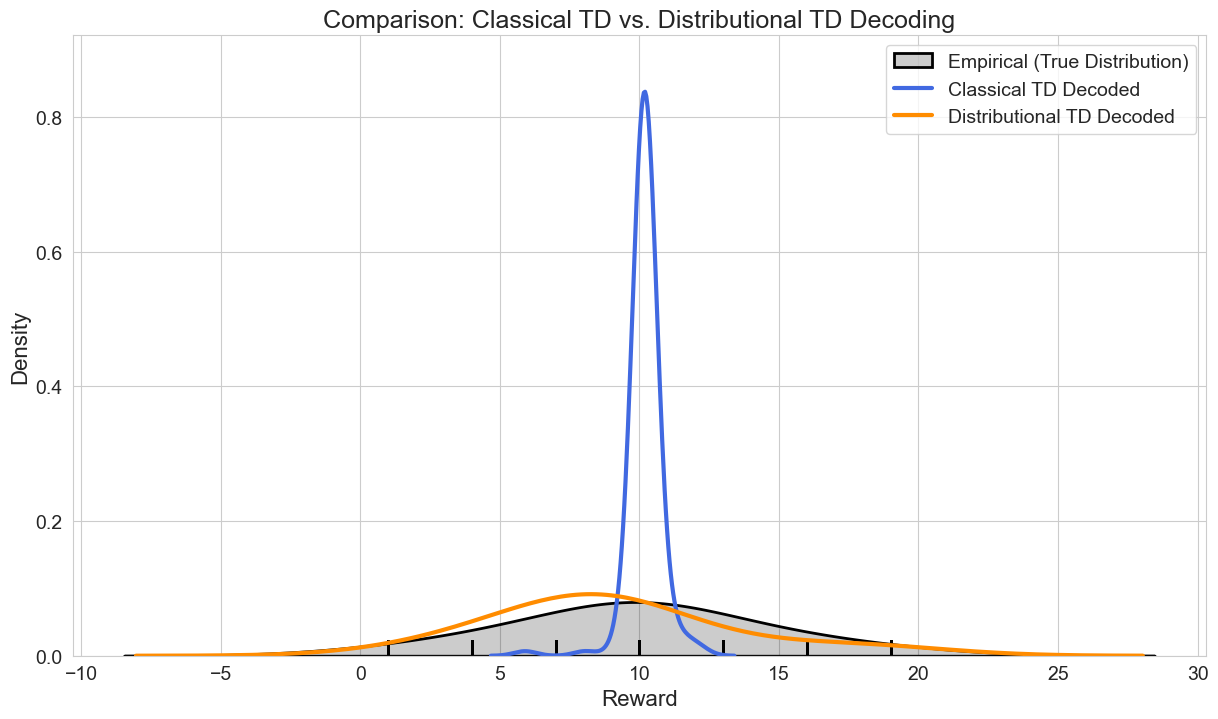

In [51]:
sampled_empirical_dist = np.random.choice(
    juice_amounts, p=juice_empirical_probs, size=1000)


td_values = np.zeros((n_trials, num_cells))
alpha = np.random.random(num_cells) * beta
for trial in range(n_trials):
  for step in range(n_epochs):
    reward = np.random.choice(juice_amounts, p=juice_empirical_probs)
    delta = reward - td_values[trial]
    td_values[trial] += alpha * delta

td_samples = []
for t in range(n_decodings):
    scaling_noise = np.tanh(np.random.normal(size=len(alpha))) * asym_variance
    noisy_tau = np.clip(0.5 + scaling_noise, 0., 1.)
    values, loss = run_expectile_decoding(
        td_values.mean(0), noisy_tau,
        minv=juice_amounts.min(), maxv=juice_amounts.max(),
        max_epochs=1, N=len(asym_values) - 1, max_samples=20000, method='TNC'
    )
    td_samples.append(values)
td_reward_decode = np.array(td_samples).flatten()


distribution = np.zeros((n_trials, num_cells))
alpha_pos = np.random.random((num_cells))*beta
alpha_neg = np.random.random((num_cells))*beta
for trial in range(n_trials):
  for step in range(n_epochs):
    reward = np.random.choice(juice_amounts, p=juice_empirical_probs)
    delta = reward - distribution[trial]
    valence = np.array(delta <= 0., dtype=np.float32)
    distribution[trial] += (valence * alpha_neg + (1. - valence) * alpha_pos) * (delta)

dtd_samples = []
taus = alpha_pos / (alpha_pos + alpha_neg)
for t in range(n_decodings):
  scaling_noise = np.tanh(np.random.normal(size=len(taus))) * asym_variance
  noisy_tau = np.clip(taus + scaling_noise, 0., 1.)
  values, loss = run_expectile_decoding(
      distribution.mean(0), noisy_tau, 
      minv=juice_amounts.min(), maxv=juice_amounts.max(),
      max_epochs=1, N=len(asym_values)-1, max_samples=20000, method='TNC')
  dtd_samples.append(values)
dtd_reward_decode = np.array(dtd_samples).flatten()

plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')

sns.kdeplot(sampled_empirical_dist, bw_method=.75, color='black', lw=2, 
            fill=True, alpha=0.2, label="Empirical (True Distribution)")
sns.rugplot(sampled_empirical_dist, color='black')

sns.kdeplot(td_reward_decode, bw_method=.75, color='royalblue', lw=3, label="Classical TD Decoded")

sns.kdeplot(dtd_reward_decode, bw_method=.75, color='darkorange', lw=3, 
            label="Distributional TD Decoded")

plt.tick_params(top=False, right=False, labelsize=14)
plt.legend(loc="best", fontsize=14)
plt.xlabel("Reward", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.title("Comparison: Classical TD vs. Distributional TD Decoding", fontsize=18)
plt.tight_layout(pad=0)
plt.show()